In [237]:
import pandas as pd
import numpy as np

In [238]:
df=pd.read_csv('daily_logs.csv')
df.head()

,id,baby_id,date,alcoholoption,braxtonoption,crampoption,exerciseoption,kegeloption,prenatalvitamin,smokeoption,spottingcoloroption,spottingoption,wateroption,moods,sleepoption,symptomsoption,sicknessoptions
0,1,00mPJzsnYddMd5UBB25kuhDr5kD3,2019-05-08,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,"calm,excited,happy,motivated",7:0,"{gastrointestinal:{constipation:2},general:{fa...",NaN
1,2,00sk3ME8KOZPequSCRQs1dN8u7Z2,2019-05-03,0.0,0.0,1.0,3.0,0.0,1.0,2.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN
2,3,04crFSBSgXQbQqz7EkPOEuAduXr2,2019-04-11,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,"anxious,calm,loved",11:0,"{gastrointestinal:{bloating:1,diarrhea:2},gene...",{_1:true}
3,4,04crFSBSgXQbQqz7EkPOEuAduXr2,2019-04-12,0.0,0.0,3.0,0.0,0.0,1.0,4.0,2.0,1.0,8.0,"anxious,depressed,moody,overwhelmed,sad,tired",4:30,"{gastrointestinal:{bloating:1,heartburn:1},gen...",{_2:true}
4,5,04crFSBSgXQbQqz7EkPOEuAduXr2,2019-04-14,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,9:0,NaN,NaN


In [239]:
df.drop(['id','baby_id','date'],axis=1,inplace=True)

In [240]:
cols = ["sad", "angry", "moody", "anxious", "overwhelmed", "tired", "depressed", "happy", "calm", "motivated", "confident", "loved"]
for col in cols: df[col] = 0

In [241]:
for index, row in df.iterrows():
    moods = str(row['moods']).split(',')
    for m in moods:
        if m in cols:
            df.ix[index, m] = 1



C:\Users\salee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [242]:
df.drop('moods',axis=1,inplace=True)

In [243]:
df.symptomsoption.unique()

array(['{gastrointestinal:{constipation:2},general:{fatigue:2,frequentUrination:2,headache:2,tenderBreasts:1},secondTrimester:{backache:1,shortness:2,snoring:1},unusual:{itching:1},vaginalDischarge:{clear:1}}',
       nan,
       '{gastrointestinal:{bloating:1,diarrhea:2},general:{fatigue:2,frequentUrination:1,tenderBreasts:1},unusual:{pelvicPressure:1},vaginalDischarge:{clear:1}}',
       ..., '{general:{dizziness:1,frequentUrination:1,tenderBreasts:2}}',
       '{gastrointestinal:{bloating:1,constipation:2},general:{dizziness:1,fatigue:3,frequentUrination:1,headache:1,tenderBreasts:1},secondTrimester:{appetite:2,backache:1,shortness:1,snoring:3,swelling:3},unusual:{legPain:1},vaginalDischarge:{clear:2}}',
       '{gastrointestinal:{constipation:2,flatulence:1},general:{fatigue:1,frequentUrination:1,headache:1,tenderBreasts:1},secondTrimester:{appetite:2,backache:1,shortness:1,veins:1},unusual:{legPain:1}}'],
      dtype=object)

In [244]:

cols=["constipation", "backache", "fatigue", "headache", "bloating", "frequentUrination", "diarrhea", "heartburn","flatulence"]

for col in cols: df[col] = 0



            



In [245]:
import re

for index,row in df.iterrows():
    
    
    

    for col in cols:
        if re.search(col,str(row['symptomsoption'])):
            
            df.ix[index, col] = 1

C:\Users\salee\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [60]:
df[["sad", "angry", "moody", "anxious", "overwhelmed", "tired", "depressed", "happy", "calm", "motivated", "confident", "loved"]]

,sad,angry,moody,anxious,overwhelmed,tired,depressed,happy,calm,motivated,confident,loved
0,0,0,0,0,0,0,0,1,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,0,1
3,1,0,1,1,1,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1,0,0,0,0,0
6,0,0,0,1,0,1,0,1,1,1,1,1
7,0,0,0,1,0,1,0,0,1,0,0,1
8,0,0,1,0,0,1,0,0,1,0,0,0
9,0,0,0,1,0,1,0,0,1,0,0,0


In [246]:
mood=df.copy()

In [247]:
mood.drop('sicknessoptions',axis=1,inplace=True)

In [248]:
mood.columns

Index(['alcoholoption', 'braxtonoption', 'crampoption', 'exerciseoption',
       'kegeloption', 'prenatalvitamin', 'smokeoption', 'spottingcoloroption',
       'spottingoption', 'wateroption', 'sleepoption', 'symptomsoption', 'sad',
       'angry', 'moody', 'anxious', 'overwhelmed', 'tired', 'depressed',
       'happy', 'calm', 'motivated', 'confident', 'loved', 'constipation',
       'backache', 'fatigue', 'headache', 'bloating', 'frequentUrination',
       'diarrhea', 'heartburn', 'flatulence'],
      dtype='object')

In [249]:
mood.drop('symptomsoption',axis=1,inplace=True)

In [250]:
mood.drop('sleepoption',axis=1,inplace=True)

In [251]:
mood[['alcoholoption','braxtonoption','crampoption','exerciseoption','kegeloption','prenatalvitamin','smokeoption','spottingcoloroption','spottingoption','wateroption']]=mood[['alcoholoption','braxtonoption','crampoption','exerciseoption','kegeloption','prenatalvitamin','smokeoption','spottingcoloroption','spottingoption','wateroption']].fillna(0)

,alcoholoption,braxtonoption,crampoption,exerciseoption,kegeloption,prenatalvitamin,smokeoption,spottingcoloroption,spottingoption,wateroption,...,loved,constipation,backache,fatigue,headache,bloating,frequentUrination,diarrhea,heartburn,flatulence
0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,...,0,1,1,1,1,0,1,0,0,0
1,0.0,0.0,1.0,3.0,0.0,1.0,2.0,0.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,...,1,0,0,1,0,1,1,1,0,0
3,0.0,0.0,3.0,0.0,0.0,1.0,4.0,2.0,1.0,8.0,...,0,0,0,1,1,1,1,0,1,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [252]:
y = ["sad"]

In [253]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

y=mood[y]

In [254]:
train=mood.drop(y,axis=1)

In [255]:
train['alcoholoption']=train['alcoholoption'].astype(int)
train['braxtonoption']=train['braxtonoption'].astype(int)
train['crampoption']=train['crampoption'].astype(int)
train['exerciseoption']=train['exerciseoption'].astype(int)
train['kegeloption']=train['kegeloption'].astype(int)
train['prenatalvitamin']=train['prenatalvitamin'].astype(int)
train['smokeoption']=train['smokeoption'].astype(int)
train['spottingcoloroption']=train['spottingcoloroption'].astype(int)
train['wateroption']=train['wateroption'].astype(int)
train['spottingoption']=train['spottingoption'].astype(int)

In [256]:
n_valid = 1000  # same as Kaggle's test set size
n_trn = len(mood)-n_valid

X_train, X_valid = split_vals(train, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [258]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1)
%time 
m.fit(X_train, y_train.values.ravel())


Wall time: 0 ns


C:\Users\salee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [259]:
from sklearn.metrics import classification_report,confusion_matrix

predictions=m.predict(X_valid)
print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       931
           1       0.38      0.13      0.19        69

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.66      0.56      0.58      1000
weighted avg       0.90      0.93      0.91      1000



In [260]:
from sklearn import metrics
print(metrics.accuracy_score(y_valid,predictions))

0.925


In [261]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)


fi = rf_feat_importance(m, train)

fi

,cols,imp
9,wateroption,0.131463
15,depressed,0.117643
11,moody,0.051996
13,overwhelmed,0.051010
3,exerciseoption,0.050669
2,crampoption,0.048504
10,angry,0.040618
6,smokeoption,0.038114
14,tired,0.037643
5,prenatalvitamin,0.036936


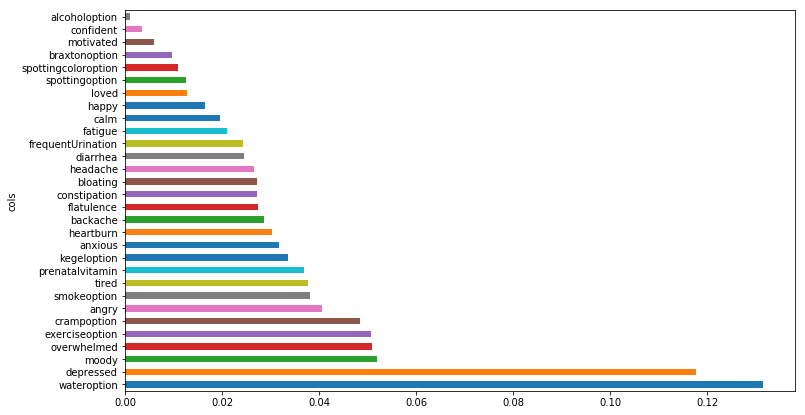

In [262]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi);

In [263]:
to_keep = fi[fi.imp>0.014].cols; len(to_keep)

23

In [264]:
df_keep = train[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

m = RandomForestClassifier(n_jobs=-1)
%time 
m.fit(X_train, y_train.values.ravel())

Wall time: 0 ns


C:\Users\salee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [265]:
predictions=m.predict(X_valid)

from sklearn import metrics
print(metrics.accuracy_score(y_valid,predictions))

0.93
